# TESS phase coverage

In this tutorial, we use portrait to estimate the overall phase coverage of the TESS light curve of TOI-120.

## Loading the data

We start by downloading the TESS light curve of TOI-120 using the `lightkurve` package.

In [27]:
import lightkurve as lk
import numpy as np

# single sector
lc = lk.search_lightcurve("TOI 120", author="SPOC", exptime=120)[0].download()

# masking nans
time = lc.time.to_value("btjd")
flux = lc.pdcsap_flux.to_value().filled(np.nan)
mask = np.isnan(flux) | np.isnan(time)
time = time[~mask].astype(float)

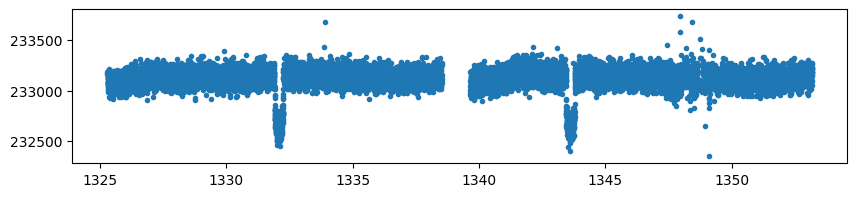

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
_ = plt.plot(time, flux[~mask], ".")

## Phase coverage

The light curve shows the transits of [TOI-120 b](https://science.nasa.gov/exoplanet-catalog/hd-1397-b/) which has an orbital period of 11.5. Without a surprise, this period is completely covered by the TESS observations, indeed

In [31]:
from portrait import coverage

phase_coverage = coverage(time)(11.5)
print(f"Phase coverage: {phase_coverage*100:.0f}%")

Phase coverage: 100%


However, since only one sector has been observed, longer period might like coverage. We can compute the phase coverage for a range of period with

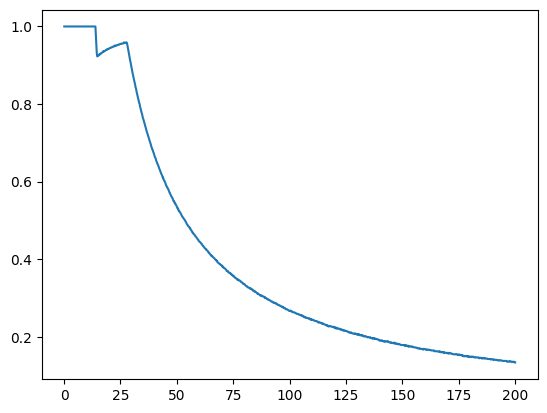

In [32]:
import matplotlib.pyplot as plt

periods = np.linspace(0.1, 200, 1000)
phase_coverage = coverage(time)(periods)

_ = plt.plot(periods, phase_coverage)

A mean estimate of the amount of phase not observed for a range of periods can be optained with

In [33]:
min_period, max_period = 10, 25
long_period_observed = np.mean(
    phase_coverage[(periods > min_period) & (periods < max_period)]
)
print(
    f"{min_period}-{max_period} days: {100 - long_period_observed**3 *100:.2f}% unobserved"
)

10-25 days: 12.22% unobserved


Which mean TESS has about that percent of chances to have missed a longer period transit of TOI-120 b (ignoring all other probabilities). Of course this applies more or less to all target observed in a single TESS sector.